In [119]:
'''
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

In [120]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

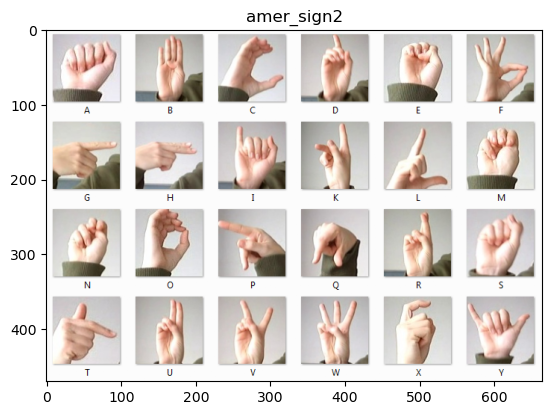

In [121]:
plt.title("amer_sign2")
image = mpimg.imread("/kaggle/input/sign-language-mnist/amer_sign2.png")
plt.imshow(image)
plt.show()

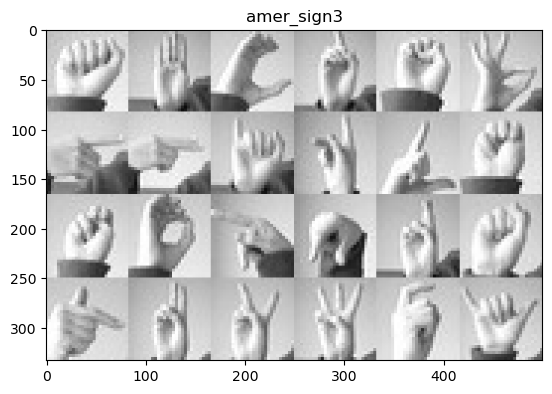

In [122]:
plt.title("amer_sign3")
image = mpimg.imread("/kaggle/input/sign-language-mnist/amer_sign3.png")
plt.imshow(image)
plt.show()

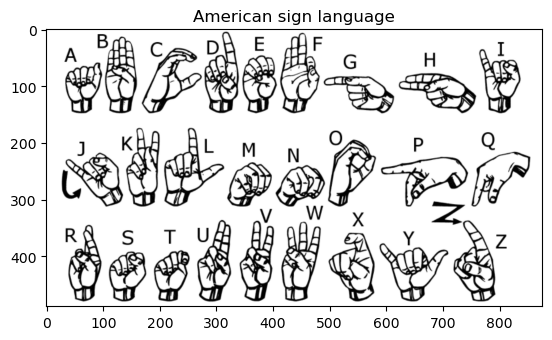

In [123]:
plt.title("American sign language")
image = mpimg.imread("/kaggle/input/sign-language-mnist/american_sign_language.PNG")
plt.imshow(image)
plt.show()

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [126]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [127]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [129]:
train_df.shape

(27455, 785)

In [130]:
test_df.shape

(7172, 785)

In [131]:
train_label=train_df['label']
trainset=train_df.drop(['label'],axis=1)

In [132]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)

In [133]:
X_train.shape

(27455, 28, 28, 1)

In [134]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [135]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [136]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [137]:
X_train

array([[[[107],
         [118],
         [127],
         ...,
         [170],
         [170],
         [169]],

        [[111],
         [121],
         [129],
         ...,
         [171],
         [171],
         [170]],

        [[113],
         [123],
         [131],
         ...,
         [171],
         [171],
         [171]],

        ...,

        [[142],
         [150],
         [159],
         ...,
         [202],
         [201],
         [200]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]]],


       [[[155],
         [157],
         [156],
         ...,
         [138],
         [ 92],
         [108]],

        [[158],
         [159],
         [159],
         ...,
         [142],
         [116],
         [143]],

        [[161],
         [161],
         [161],
         ...,
         [147],
         [

In [138]:
X_test=X_test.values.reshape(-1,28,28,1)

In [139]:
X_train.shape

(27455, 28, 28, 1)

In [140]:
y_train.shape

(27455, 25)

In [141]:
X_test.shape

(7172, 28, 28, 1)

In [142]:
y_test.shape

(7172, 25)

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [144]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)

In [145]:
X_test = X_test / 255.0

In [146]:
# Build the model
model = Sequential([
    Conv2D(128,kernel_size=(5,5),strides=1,padding='same',
           activation='relu',input_shape=(28,28,1)),
    MaxPool2D(pool_size=(3,3),strides=2,padding='same'),
    Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'),
    MaxPool2D((2,2),2,padding='same'),
    Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'),
    MaxPool2D((2,2),2,padding='same'),
    Flatten(),
    Dense(units=512,activation='relu'),
    Dropout(rate=0.25),
    Dense(units=25,activation='softmax')
    
])

In [147]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [148]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [149]:
X_train.shape

(27455, 28, 28, 1)

In [150]:
y_train.shape

(27455, 25)

In [151]:
history = model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 13s 78ms/step - loss: 3.0478 - accuracy: 0.0909 - val_loss: 2.5008 - val_accuracy: 0.2269
Epoch 2/35
138/138 [==============================] - 11s 76ms/step - loss: 2.3039 - accuracy: 0.2791 - val_loss: 1.5511 - val_accuracy: 0.4806
Epoch 3/35
138/138 [==============================] - 10s 72ms/step - loss: 1.7031 - accuracy: 0.4461 - val_loss: 1.0670 - val_accuracy: 0.6283
Epoch 4/35
138/138 [==============================] - 10s 75ms/step - loss: 1.3096 - accuracy: 0.5632 - val_loss: 0.8075 - val_accuracy: 0.7211
Epoch 5/35
138/138 [==============================] - 11s 80ms/step - loss: 1.0814 - accuracy: 0.6375 - val_loss: 0.6955 - val_accuracy: 0.7632
Epoch 6/35
138/138 [==============================] - 10s 72ms/step - loss: 0.9052 - accuracy: 0.6897 - val_loss: 0.5995 - val_accuracy: 0.7999
Epoch 7/35
138/138 [==============================] - 10s 74ms/step - loss: 0.7995 - accuracy: 0.7325 - val_loss: 0.4868 - val_accuracy:

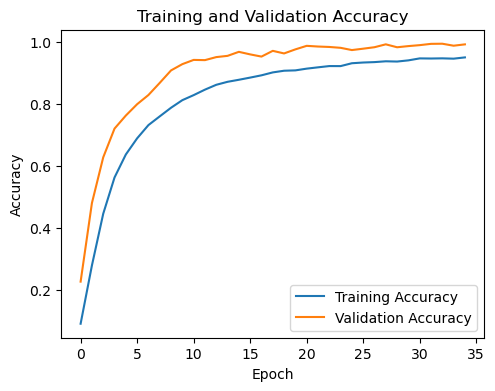

In [152]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

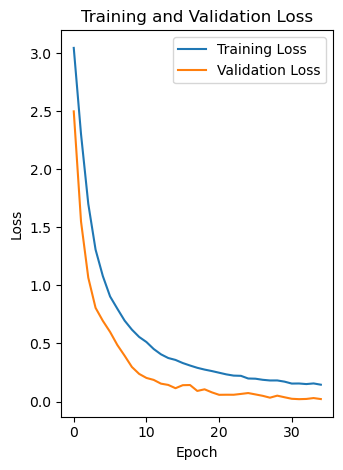

In [153]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [154]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.0210 - accuracy: 0.9932


In [155]:
print('ACCURACY = {}%'.format(acc*100))

ACCURACY = 99.31678771972656%
